# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
mars_sols = html_soup.find_all('tr', class_='data-row')
mars_sols[:2]

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_weather_data = []
# Loop through the scraped data to create a list of rows
for mars_sol in mars_sols:
    sol_data = mars_sol.find_all('td')
     
    data_row = []
    for i in range(0,7):
        
        data_row.append(sol_data[i].text)
           
    mars_weather_data.append(data_row)   

mars_weather_data[:10]


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']]

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
mars_weather_df = pd.DataFrame(mars_weather_data, columns = column_names)

In [9]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
import numpy as np

# Define a dictionary to specify the desired data types for each column
data_type_mapping = {
    'terrestrial_date': 'datetime64',
    'sol': 'int',
    'ls': 'float',
    'month': 'int',
    'min_temp': 'float',
    'pressure': 'float'
}

# Convert columns to the specified data types
for column, new_type in data_type_mapping.items():
    try:
        mars_weather_df[column] = mars_weather_df[column].astype(new_type)
    except ValueError:
        # Handle any conversion errors (e.g., if data can't be converted)
        mars_weather_df[column] = mars_weather_df[column].replace('NA', np.nan).astype(new_type)

In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months exist on Mars?
number_of_months = len(mars_weather_df['month'].unique())
print("Number of months on Mars:", number_of_months)


Number of months on Mars: 12


In [14]:
# 2. How many Martian days' worth of data are there?
number_of_martian_days = len(mars_weather_df['sol'].unique())
print("Number of Martian days in the dataset:", number_of_martian_days)

Number of Martian days in the dataset: 1867


In [15]:
# 3. What is the average low temperature by month?
# Calculate the average minimum daily temperature for each month
average_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = average_temp_by_month.idxmin()
warmest_month = average_temp_by_month.idxmax()

print("Coldest month on Mars:", coldest_month)
print("Warmest month on Mars:", warmest_month)

Coldest month on Mars: 3
Warmest month on Mars: 8


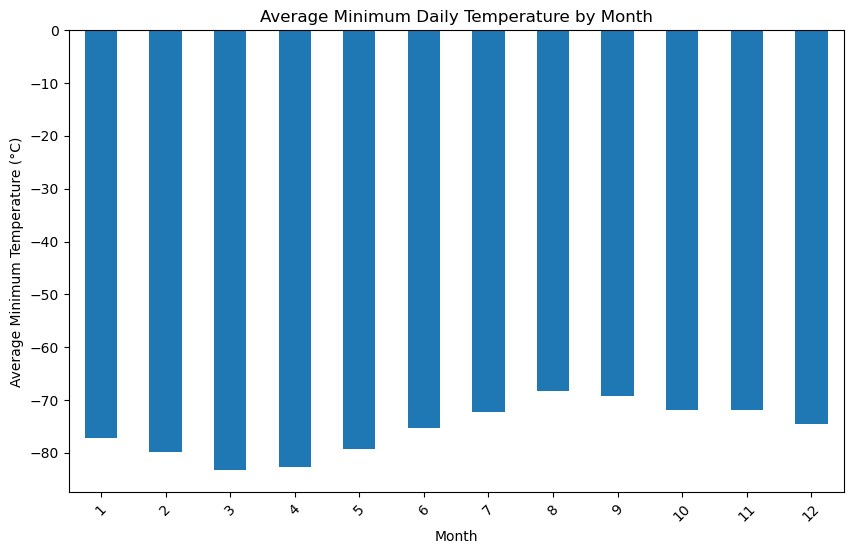

In [16]:
# Plot the average temperature by month

plt.figure(figsize=(10, 6))
average_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Daily Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average minimum daily temperature for each month at Curiosity's location
average_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_temp_by_month.idxmin()
hottest_month = average_temp_by_month.idxmax()

print("Coldest month at Curiosity's location:", coldest_month)
print("Hottest month at Curiosity's location:", hottest_month)


Coldest month at Curiosity's location: 3
Hottest month at Curiosity's location: 8


In [18]:
# 4. Average pressure by Martian month
# Calculate the average daily atmospheric pressure for each month
average_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

# Find the months with the lowest and highest atmospheric pressure
lowest_pressure_month = average_pressure_by_month.idxmin()
highest_pressure_month = average_pressure_by_month.idxmax()

print("Month with the lowest atmospheric pressure on Mars:", lowest_pressure_month)
print("Month with the highest atmospheric pressure on Mars:", highest_pressure_month)

Month with the lowest atmospheric pressure on Mars: 6
Month with the highest atmospheric pressure on Mars: 9


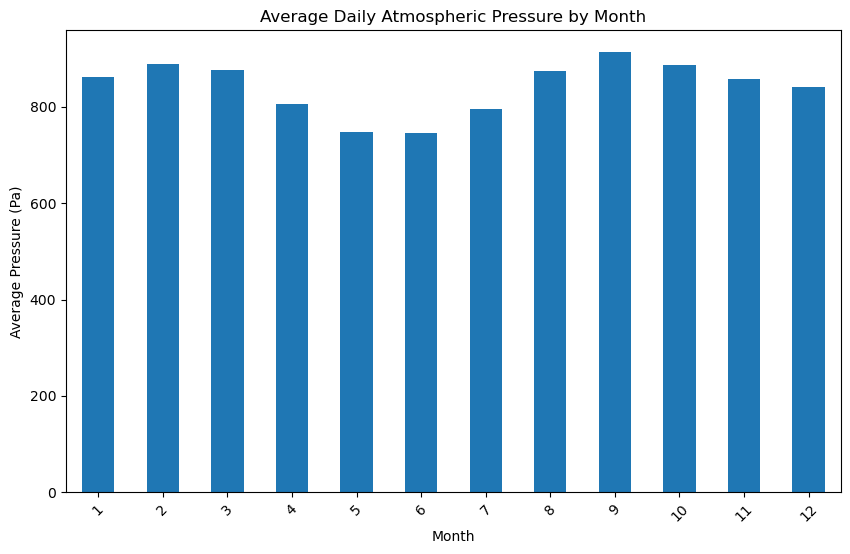

In [19]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar')
plt.title('Average Daily Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Find the start and end dates in the dataset
start_date = mars_weather_df['terrestrial_date'].min()
end_date = mars_weather_df['terrestrial_date'].max()

# Calculate the duration in Earth days
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
duration_in_earth_days = (end_date - start_date).days

print("Estimated number of terrestrial days in a Martian year:", duration_in_earth_days)



Estimated number of terrestrial days in a Martian year: 2021


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV

mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [23]:
browser.quit()